In [1]:
import optuna.integration.lightgbm as lgb
import lightgbm as lgb_o
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
df = pd.read_csv("./data/urshifu_pt.csv")

In [3]:
train_df,test_df = train_test_split(df,random_state=0)

In [4]:
train_x = train_df.drop("label",axis = 1)
train_y = train_df["label"]
test_x = test_df.drop("label",axis = 1)
test_y = test_df["label"]

In [5]:
lgb_train = lgb_o.Dataset(train_x, train_y)
lgb_eval = lgb_o.Dataset(test_x, test_y, reference=lgb_train)

In [27]:
params = {'objective': 'binary','metric': 'auc','verbosity': -1,"seed":0}

model = lgb.train(params, lgb_train, valid_sets=lgb_eval,verbose_eval=False, num_boost_round=1000, early_stopping_rounds=100)

[I 2022-01-26 12:26:14,060] A new study created in memory with name: no-name-d4b7b97c-909b-4704-bf55-159fa7e25510
feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]/home/yuuuuutaro/.cache/pypoetry/virtualenvs/urshifu-uBlELXII-py3.8/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/yuuuuutaro/.cache/pypoetry/virtualenvs/urshifu-uBlELXII-py3.8/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM

In [28]:
pred_y = model.predict(test_x, num_iteration=model.best_iteration)

In [29]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y)
auc = metrics.auc(fpr, tpr)
print(auc)

0.8045021483280405


In [30]:
print('Best Params:', model.params)

Best Params: {'objective': 'binary', 'metric': 'auc', 'verbosity': -1, 'seed': 0, 'feature_pre_filter': False, 'lambda_l1': 0.0, 'lambda_l2': 0.0, 'num_leaves': 4, 'feature_fraction': 0.6839999999999999, 'bagging_fraction': 1.0, 'bagging_freq': 0, 'min_child_samples': 20, 'num_iterations': 1000, 'early_stopping_round': 100}


In [31]:
model.save_model('./models/optunalgbm.txt')

In [11]:
#bst = lgb.Booster(model_file='model.txt')
#ypred = bst.predict(X_test, num_iteration=bst.best_iteration)

In [32]:
print((np.array(pred_y)>0.5).astype("int64"))

[0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0
 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1
 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1
 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1
 0]


[114 126  99  81  41  75  36   6  23  19   7  10   7  13  38  17  69   9
  28   4  25  17  46  13  25]


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

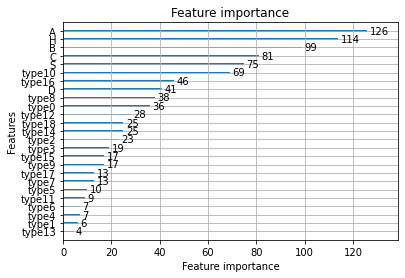

In [33]:
print(model.feature_importance())


# 特徴量の重要度をプロット
lgb.plot_importance(model)

In [34]:
from pokepoke import poke
poke_data = poke()

In [35]:
poke_data.poke_type

['ノーマル',
 'かくとう',
 'ひこう',
 'どく',
 'じめん',
 'いわ',
 'むし',
 'ゴースト',
 'はがね',
 'ほのお',
 'みず',
 'くさ',
 'でんき',
 'エスパー',
 'こおり',
 'ドラゴン',
 'あく',
 'フェアリー']